# Vorlesung

## Konfiguration und Python-Pakete

In [2]:
import matplotlib.pyplot as plt

# falls nicht vorhanden:
#    conda install networkx pydot
#    conda install -c conda-forge pygraphviz
import networkx as nx

## Einführung

### Kurzdefinition

Ein Graph ist ein Modell einer realen Gegebenheit, das deren relevante Objekte und die relevanten Verbindungen zwischen den Objekten abbildet.

### Anwendungsgebiete

Es gibt sehr viele Situationen, die mittels Graphen modelliert werden. Hier eine kleine Auswahl:

- wirtschaftliche oder soziale Beziehungen
- Kommunikationsnetze wie das Internet
- Verkehrsnetze: Straßennetz, U-Bahnnetz, Flugverbindungen
- Stromverteilungsnetze
- Molekülstrukturen
- Stammbäume
- Ordnersturkturen
- [Feynman-Diagramme](https://de.wikipedia.org/wiki/Feynman-Diagramm)
- [semantische Netze](https://de.wikipedia.org/wiki/Semantisches_Netz)

### Implementierung

Wir verwenden das Python-Paket [NetworkX](http://networkx.github.io/). 

### Grafische Darstellung

Die Objekte (Knoten) werden als Kreise gezeichnet, die Verbindungen (Kanten) als Linien. Die Position der Objekte ist ohne Zusatzinformationen nicht bestimmt.

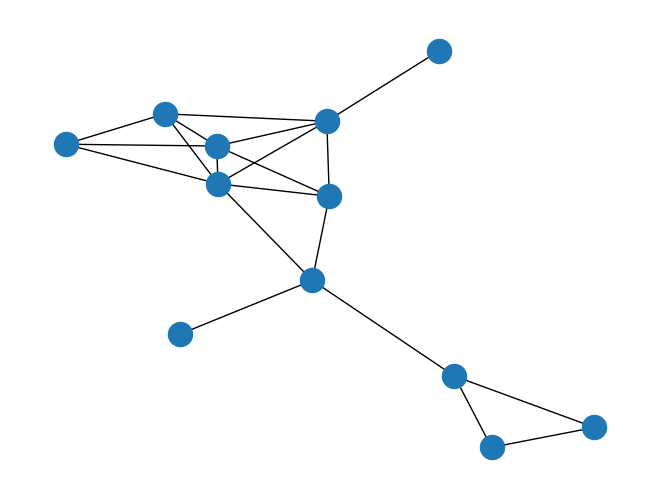

In [3]:
G = nx.random_geometric_graph(n=12, radius=0.35)
nx.draw(G)

### Beispiel: Verletzlichkeit von Kommunikationsnetzen

Kommunikationsnetzwerke lassen sich gut durch Knoten und Verbindungslinien zwischen den Knoten darstellen: Die Knoten entsprechen den Stationen, die Verbindungslinien den Datenubertragungswegen. In der folgenden Abbildung sind vier Grundformen gebräuchlicher Netzwerke dargestellt.

![Kommunikationsnetzwerke.png](../abbildungen/Kommunikationsnetzwerke.png)

*Quelle:* Turau, Weyer: Algorithmische GraphentheorieTurau, Weyer: Algorithmische Graphentheorie

**Übung:** Beantworten Sie für jede Grundform folgende typischen Fragen:

- Wie viele und welche Stationen können ausfallen, sodass die Kommunikation zwischen den restlichen Stationen weiter möglich ist?
- Wie viele und welche Leitungen können ausfallen, sodass die Kommunikation zwischen den Stationen weiter möglich ist?

### Beispiel: Königsberger Brückenproblem

Das [Königsberger Brückenproblem](https://de.wikipedia.org/wiki/Königsberger_Brückenproblem) ist das klassiche Einsteiger-Graphentheorie-Problem:
In der Stadt Königsberg gab es im 18. Jahrhundert sieben Brücken über den Fluss Pregel, die die beiden Ufer und die zwei Inseln miteinander verbanden.
Auf der Karte von Königsberg aus dem Jahr 1652 sind die sieben Brücken eingezeichnet.

![Konigsberg_bridges.pngKonigsberg_bridges.png](../abbildungen/Konigsberg_bridges.png)
*Quelle:* [Wikimedia](https://commons.wikimedia.org/wiki/File:Konigsberg_bridges.png)

Damals fragten sich einige Königsberger: **"Gibt es einen Weg (egal, ob geschlossen oder nicht) durch die Stadt, der jede Brücke genau einmal verwendet?"**
Im Jahr 1736 beantwortete Leonhard Euler diese Frage mit Nein und verwendete für seinen Beweis eine Methode, die die moderne Graphentheorie begründete.

**Eulers Analyse:**

1. Modellierung der Stadt als Graph: Knoten = zusammenhängende Landgebiete, Kanten = Brücken.
   
   ![](../abbildungen/Konigsberg_graph.jpg)

2. Argumentation: Wenn ein Knoten, der nicht Anfangs- oder Endknoten des Weges ist, besucht wird, benötigt es zwei unterschiedliche Kanten, eine zum Knoten und eine weg vom Knoten. Alle vier Knoten haben aber eine ungerade Anzahl an Kanten, sodass es keinen solchen Weg gibt.

## Definitionen

*Dieser Abschnitt folgt den Darstellungen im Buch "Algorithmische Graphentheorie" von Turau und Weyer.*

Ein **ungerichteter Graph** $G$ besteht aus einer Menge von **Knoten (Ecken, Punkte, englisch: vertices, nodes, points)** und einer Menge von **Kanten (Bögen, englisch: edges, links, lines)**.
Eine Kante wird durch ein ungeordnetes Paar von Knoten, den **Endknoten** der Kante, angegeben und als **Linie** gezeichnet.

*Beispiel:*

- Menge der Ecken  = $E = \{ e_1, e_2, e_3, e_4, e_5 \}$
- Menge der Kanten = $K = \{ \{e_1, e_2\}, \{e_2, e_3\}, \{e_3, e_5\}, \{e_5, e_4\}, \{e_2, e_4\} \}$

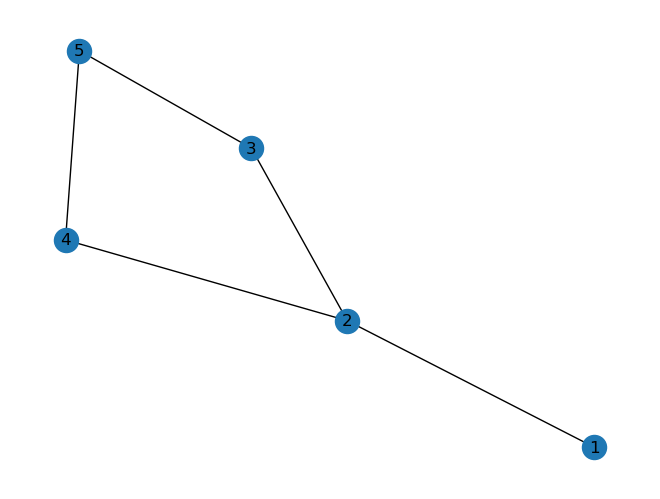

In [4]:
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 5), (5, 4), (2, 4)])

nx.draw(G, with_labels=True)

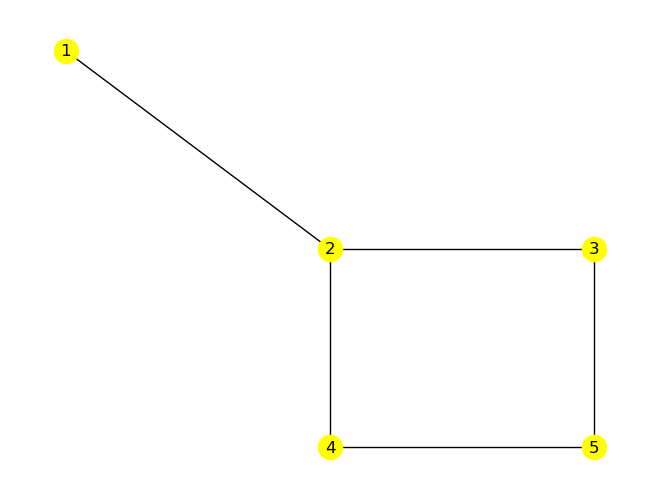

In [5]:
pos = {1:(0,2), 2:(1,1), 3:(2,1), 4:(1,0), 5:(2,0)}
nx.draw(G, pos=pos, with_labels=True, node_color='yellow')

In [6]:
print(f"Knoten: {G.nodes}")
print(f"Kanten: {G.edges}")

Knoten: [1, 2, 3, 5, 4]
Kanten: [(1, 2), (2, 3), (2, 4), (3, 5), (5, 4)]


Ein **gerichteter Graph (Digraph, englisch directed: graph)** $D$ besteht aus einer Menge von Knoten und einer Menge von **gerichteten Kanten**, die durch geordnete Paare von Knoten, den **Anfangsknoten** und den **Endknoten**, bestimmt sind. Die gerichteten Kanten werden statt durch Linien durch **Pfeile** gekennzeichnet, wobei der Pfeil von ihrem Anfangs- zu ihrem Endknoten zeigt.

*Beispiel:*

- Menge der Ecken  = $E = \{ e_1, e_2, e_3, e_4 \}$
- Menge der Kanten = $K = \{ (e_1, e_3), (e_2, e_1), (e_2, e_4), (e_3, e_2), (e_3, e_4) \}$

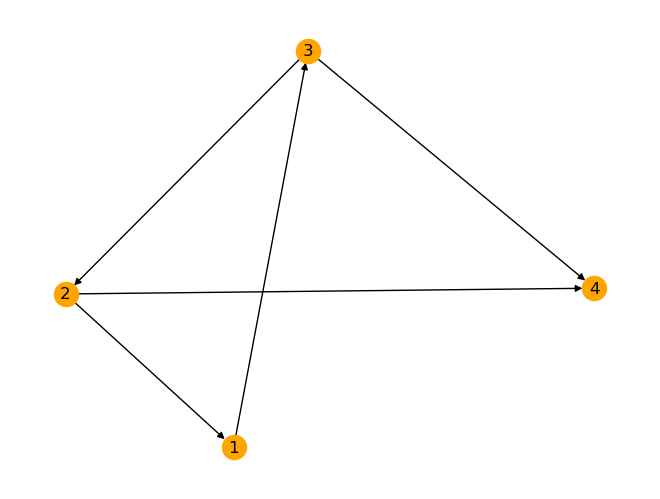

In [7]:
D = nx.DiGraph()
D.add_edges_from([(1,3), (2,1), (2,4), (3,2), (3,4)])

nx.draw(D, with_labels=True, node_color='orange')

Wir betrachten nur sogenannte **schlichte (gerichtete) Graphen**. Das sind solche, die keine Mehrfachkanten zwischen zwei Ecken und keine Schleifen (= Kante, die einen Knoten mit sich selbst verbindet) haben.  Das schließt nicht aus, daß gerichtete Graphen zwischen zwei Ecken zwei Kanten mit entgegengesetzten Richtungen haben können. 

Zwei Ecken eines ungerichteten Graphen heißen **benachbart**, wenn eine Kante sie verbindet. Die Menge der **Nachbarn** einer Ecke umfasst alle beachbarten Ecken.

Eine Ecke eines ungerichteten Graphen ist **inzident** mit einer Kante, wenn die Ecke eine Endecke der Kante ist. Der **Grad** einer Ecke in einem ungerichteten Graphen ist die Anzahl der Kanten, die mit der Ecke inzident sind.

Eine Folge von Kanten $k_1, \ldots, k_n$ eines Graphen heißt **Kantenzug**, falls es eine Folge von Ecken $e_0, e_1, \ldots, e_n$ des Graphen gibt, so daß für alle $i = 1, \ldots, n$ 

- die Kante $k_i = \{e_{i-1}, e_i \}$ für ungerichtete Graphen bzw.
- die Kante $k_i = (e_{i-1}, e_i)$ für ungerichtete Graphen ist.

Ein Kantenzug heißt **Weg**, wenn alle verwendeten Kanten verschieden sind. 
Ein **Zyklus** ist ein Weg, bei dem Start- und Endknoten übereinstimmen.
Ein **Kreis** ist ein Zyklus, bei dem nur Start- und Endknoten gleich sind.

Ist $e_0 = e_n$, so heißt der Weg **geschlossen**, andernfalls heißt er **offen**.
Ein Weg heißt **einfacher Weg**, falls alle verwendeten Ecken bis auf Anfangs- und Endecke verschieden sind.

Eine Ecke $e$ kann man von der Ecke $f$ erreichen, falls es einen Weg von $f$ nach $e$ gibt.
Die Menge aller Ecken in einem **gerichteten Graphen**, die man von einer Ecke $e$ aus über genau eine Kante erreichen kann, nennt man die **Nachfolger** von $e$.
Die Menge aller Ecken, von denen aus man $e$ über genau eine Kante erreichen kann, nennt man die **Vorgänger** von $e$.

## Spezielle Graphen

### Untergraphen

Wir betrachten einen Graphen $G$ mit Eckenmenge $E$ und Kantenmenge $K$:

- Ein Graph $G'$, dessen Eckenmenge eine Teilmenge von $E$ und dessen Kantenmenge eine Teilmenge von $K$ ist, ist ein **Untergraph (Teilgraph)** von $G$. Ein Teilgraph $G'$ eines Graphen $G$ enthält also nur Knoten und Kanten, die auch in $G$ enthalten sind.
- Ist $E'$ eine Teilmenge von $E$, so nennt man den Graphen mit Eckenmenge $E'$, der allen Kanten zwischen den Ecken $E'$ enthält, die auch in $E$ vorhanden sind, **induzierten Untergraphen (induzierten Teilgraphen)** von $G$. Er enthält also die Knoten aus $E'$ und alle Kanten aus $G$ zwischen diesen Knoten.

Ein ungerichteter Graph heißt **zusammenhängend**, wenn es von jedem Knoten zu jedem anderen Knoten mindestens einen Weg gibt. Für gerichtete Graphen gibt es ähnliche Definitionen, siehe z. B. [Wikipedia: Zusammenhang (Graphentheorie)](https://de.wikipedia.org/wiki/Zusammenhang_(Graphentheorie)).
Ein maximaler zusammenhängender Teilgraph eines ungerichteten Graphen $G$ heißt **Zusammenhangskomponente** von $G$.

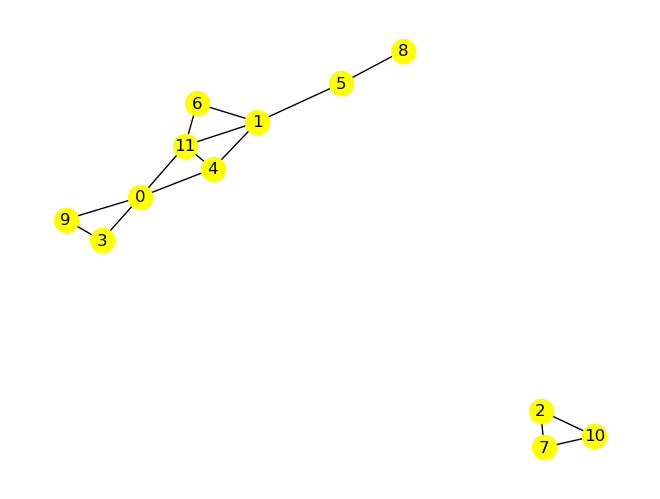

In [8]:
G = nx.random_geometric_graph(12, 0.35, seed=42)
nx.draw(G, with_labels=True, node_color='yellow')

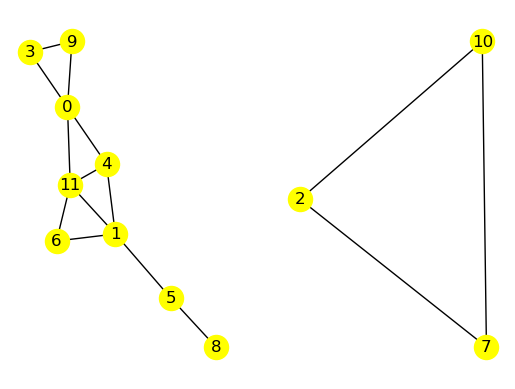

In [9]:
K = nx.number_connected_components(G)
plt.subplots(1, K)
k = 1
for C in nx.connected_components(G):
    plt.subplot(1, 2, k)
    nx.draw(G.subgraph(C).copy(), with_labels=True, node_color='yellow')
    k += 1

### Bäume

Ein ungerichteter, zusammenhängender Graph heißt **Baum**, falls er keinen geschlossenen Weg enthält. 

Ein **Wurzelbaum** ist ein Baum, bei dem eine Ecke als **Wurzel** ausgezeichnet ist. 
Von der Wurzel verschiedene Ecken mit Grad 1 nennt man **Blätter**. 
Ein gerichteter Graph $B$ heißt Baum, wenn der zugrundeliegende ungerichtete Graph ein Wurzelbaum ist und wenn es in $B$ von der Wurzel aus genau einen Weg zu jeder Ecke gibt.

Ein **Wald** ist ein ungerichteter Graph, dessen Zusammenhangskomponenten Bäume sind.

Beispiele von Anwendungen:

- Stammbäume
- Entscheidungsbäume
- Ordnerstruktur
- Suchbäume
- Organisationsstrukur einer Firma
- Huffman-Algorithmus zur Datenkompression
- Formeln, arithmetische Ausdrücke, XML-Dokumente oder die Syntax einer Programmiersprache

**Beispiel:**

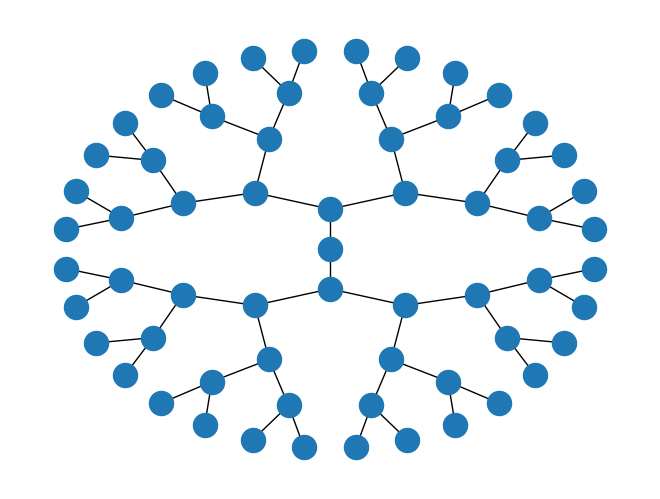

In [10]:
# r ... branching factor of the tree; each node will have `r` children.
# h ... height of the tree
T = nx.balanced_tree(r=2, h=5)

pos = nx.nx_agraph.graphviz_layout(T, prog="twopi")
nx.draw(T, pos)

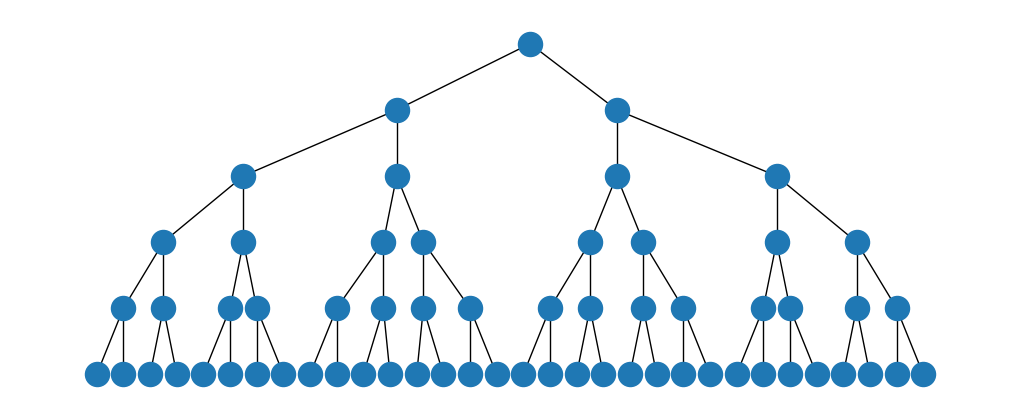

In [11]:
pos = nx.nx_agraph.graphviz_layout(T, prog="dot")
plt.figure(figsize=(10,4))
nx.draw(T, pos)

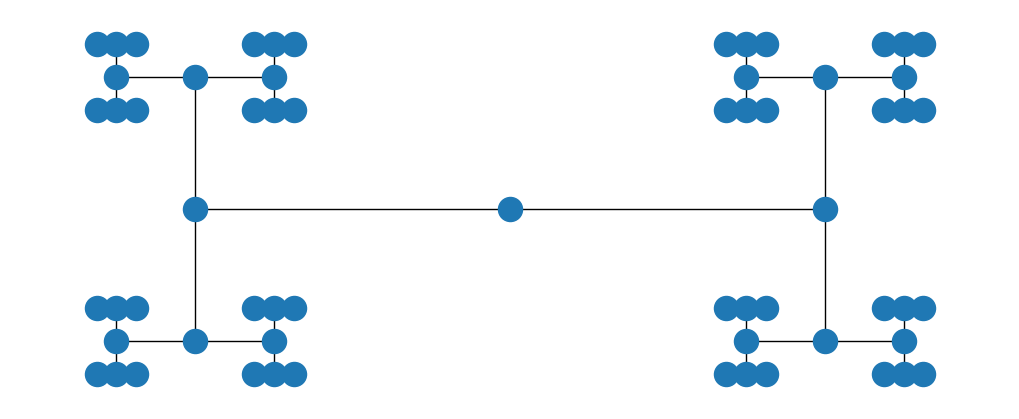

In [12]:
pos = nx.nx_agraph.graphviz_layout(T, prog="circo")
plt.figure(figsize=(10,4))
nx.draw(T, pos)

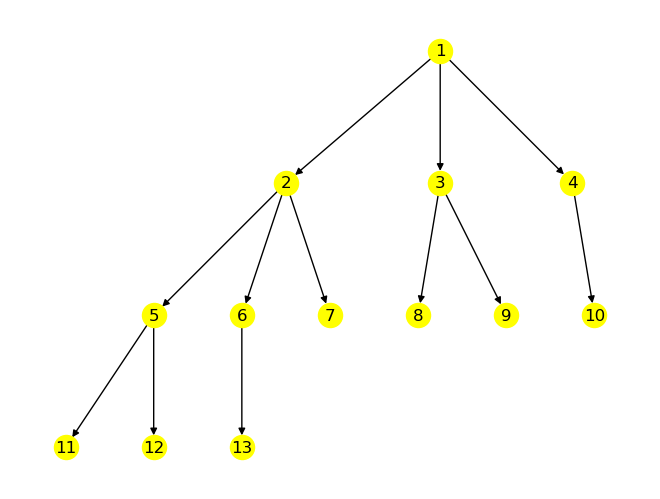

In [13]:
# gerichteter Baum:
D = nx.DiGraph()
D.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 5), 
                  (2, 6), (2, 7), (3, 8), (3, 9),
                  (4,10), (5,11), (5,12), (6,13)])

pos = nx.nx_agraph.graphviz_layout(D, prog="dot")
nx.draw(D, pos, with_labels=True, node_color='yellow')

**Eigenschaften von Bäumen:**

- Mit $m$ der Anzahl an Kanten und $n$ der Anzahl an Ecken gilt $m = n - 1$, d. h. der jeder Baum hat einen Knoten mehr als Kanten.
- Äquivalente Definitionen für einen Baum $B$: 

    + $B$ ist zusammenhängend und $m = n - 1$.
    + $B$ enthält keinen geschlossenen Weg und $m = n - 1$.
    + Es gibt in $B$ zwischen jedem Paar von Ecken genau einen Weg.
    + $B$ ist zusammenhängend, aber nimmt man irgendeine Kante weg, zerfällt $B$ in zwei Zusammenhangskomponenten.
    + $B$ ist ein zusammenhängender Graph ohne Kreise.

**Spannbäume:**

Sei $G = (E, K)$ ein ungerichteter Graph mit Eckenmenge $E$ und Kantenmenge $K$. 
Ein Baum $B = (E', K')$ heißt **Spannbaum (aufspannender Baum)** von $G$, falls $E' = E$ gilt.

**Beispiel**: In einem Wohngebiet werden Leitungen zum Empfang von Kabelfernsehen verlegt. 
Der folgende Graph beschreibt die Leitungskosten:

![Kabelfernsehen.png](../abbildungen/Kabelfernsehen.png)

- Knoten entsprechen einzelnen Häusern bzw. der Hauptleitung, die aus einem bereits verkabelten Gebiet herangeführt wird.
- Eine Kante zwischen zwei Knoten zeigt, dass eine Direktleitung gelegt werden kann. Die Kante ist mit den Kosten der Verlegung (in TEuro) beschriftet.

Problemstellung: Bestimme eine billigste Verkabelung, die alle Häuser, (möglicherweise über eine Folge von Kabeln) an die Hauptleitung anschließt!

Lösung: Wir suchen einen **minimalen Spannbaum**, d. h. einen Spannbaum mit möglichst kleiner Summe von Kantengewichten.
Die fett gezeichneten Kanten geben die Kanten eines minimalen Spannbaums an:

![Kabelfernsehen_Loesung.png](../abbildungen/Kabelfernsehen_Loesung.png)

*Quelle:* [www.thi.informatik.uni-frankfurt.de/lehre/dismod/ws1920/](http://www.thi.informatik.uni-frankfurt.de/lehre/dismod/ws1920/)

## Algorithmen

Es gibt sehr viele Graphen-Algorithmen, siehe z. B. [NetworkX: algorithms](https://networkx.github.io/documentation/stable/reference/algorithms/index.html)! 

Wir werden zuerst die Breiten- und Tiefensuche kennenlernen, mit denen zuverlässig alle Knoten eines beliebigen Graphen besucht werden können.
Danach beschäftigen wir uns mit dem Finden kürzester Wege in bewerteten Graphen und verwenden dafür den Algorithmus von Dijkstra, den dieser 1959 formuliert hat.

### Breitensuche

Idee: Ausgehend von einem Knoten wird in alle Richtungen ausgeschwärmt. 

Der Breitensuchalgorithmus für einen zusammenhängenden Graphen mit Startknoten $s$ lautet:

1. Mache den Knoten $s$ zum aktuellen Knoten und gebe diesem die Nummer 1.
2. Besuche alle zum aktuellen Knoten benachbarten Knoten und nummeriere diese fortlaufend durch, beginnend mit der nächsten freien Nummer.
3. Wenn noch nicht alle Knoten besucht sind, so mache den Knoten mit der nächsten Nummer zum aktuellen Knoten und fahre mit Schritt 2 fort.

Es entsteht ein Spannbaum. Hier ein Beispiel:

![Breitensuche.png](../abbildungen/Breitensuche.png)

*Quelle:* Turau, Weyer: Algorithmische Graphentheorie

**Implementierung in NetworkX:** [breadth first search](https://networkx.github.io/documentation/stable/reference/algorithms/traversal.html#module-networkx.algorithms.traversal.breadth_first_search).

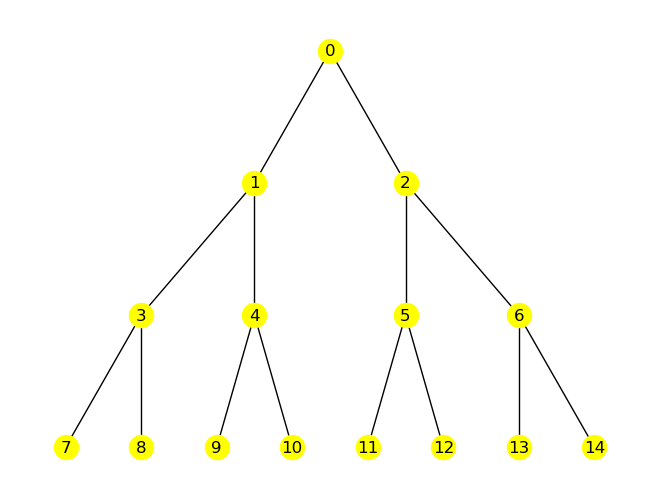

In [14]:
G = nx.balanced_tree(r=2, h=3)

pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
nx.draw(G, pos, node_color='yellow', with_labels=True)

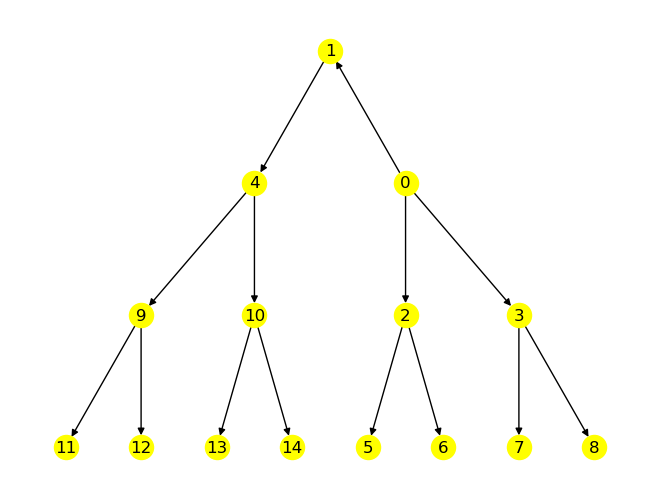

In [15]:
node_start = 2   # try different values!

# oriented tree constructed from of a breadth-first-search starting at source:
T = nx.bfs_tree(G, node_start)
edges = nx.bfs_edges(G, node_start)  # edges in bfs order

nodes = [node_start] + [v for u, v in edges]
label = {}
c = 0
for node in nodes:
    label[node] = c  # label node with bfs order
    c += 1

nx.draw(T, pos, node_color='yellow')
nx.draw_networkx_labels(T, pos, label);

### Tiefensuche

Idee: Gehe zunächst vollständig in die Tiefe, bevor abzweigende Pfade beschritten werden.

Algorithmus: Wir beginnen beim Startknoten $x$ des Graphen $G$ und gehen nach dem folgenden rekursiven Algorithmus vor:

Durchlaufe den Graphen ab Knoten $x$:

1. Markiere $x$ als besucht.
2. Für alle zu $x$ benachbarten Knoten $y$:

   Falls $y$ noch nicht besucht ist:

    1. Gehe zu $y$.
    2. Durchlaufe den Graphen ab Knoten $y$.

Das Verfahren der Tiefensuche ist ein Einzelkämpferalgorithmus: jeder Weg wird zunächst bis zum Ende verfolgt. Es entsteht wieder ein Spannbaum.

Fortsetzung des vorigen Beispiels:

![Tiefensuche.png](../abbildungen/Tiefensuche.png)

*Quelle:* Turau, Weyer: Algorithmische Graphentheorie

**Implementierung in NetworkX:** [depth first search](https://networkx.github.io/documentation/stable/reference/algorithms/traversal.html#module-networkx.algorithms.traversal.depth_first_search)

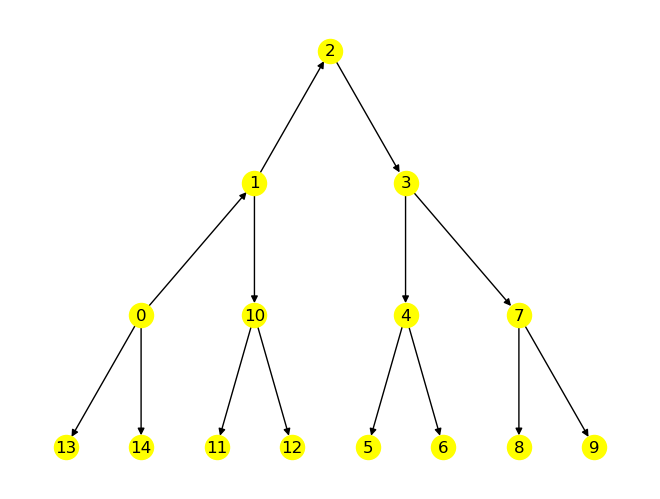

In [16]:
node_start = 3   # try different values!

# oriented tree constructed from a depth-first-search from source:
T = nx.dfs_tree(G, node_start)
edges = nx.dfs_edges(G, node_start)  # edges in dfs order

nodes = [node_start] + [v for u, v in edges]
label = {}
c = 0
for node in nodes:
    label[node] = c  # label node with dfs order
    c += 1

nx.draw(T, pos, node_color='yellow')
nx.draw_networkx_labels(T, pos, label);

### Kürzeste Wege

Ein Graph heißt **bewertet**, wenn jeder Kante ein Gewicht zugeordnet ist. 
In bewerteten Graphen ist die **Länge eines Weges** von einem Knoten zu einem anderen die Summe der Gewichte aller Kanten des Weges.

Wir gehen von einem bewerteten Graphen aus, dessen Kanten-Bewertungen alle positiv sind, sodass Wege von Knoten zu Knoten immer länger werden. In den folgenden Schritten des **Dijkstra-Algorithmus** werden sowohl die kürzesten Wegstrecken als auch deren Knotenfolgen berechnet.

1. Weise allen Knoten die beiden Eigenschaften „Distanz“ und „Vorgänger“ zu. Initialisiere die Distanz im Startknoten mit 0 und in allen anderen Knoten mit $\infty$.
2. Solange es unbesuchte Knoten gibt, 

    1. Wähle darunter denjenigen bzw. einen mit minimaler Distanz aus.
    2. Speichere, dass dieser Knoten besucht wurde.
    3. Berechne für alle noch unbesuchten Nachbarknoten die Summe des jeweiligen Kantengewichtes und damit die Distanz.
    4. Ist dieser Wert für einen Knoten kleiner als die dort gespeicherte Distanz, aktualisiere sie und setze den aktuellen Knoten als Vorgänger. Dieser Schritt wird auch als Update oder Relaxation/Relaxierung bezeichnet.

*Quelle:* [Wikipedia: Dijkstra-Algorithmus](https://de.wikipedia.org/wiki/Dijkstra-Algorithmus). Dort finden Sie auch ein durchgearbeitetes Beispiel.

*Hinweis:* Im Buch "Mathematik für Informatiker" von Hartmann ist der Algorithmus auf den Seiten 240 ff. ausführlicher beschrieben, und dort erfahren Sie auch, warum er funktioniert.

**Beispiel:**

![Dijkstra_Springer_smaller.png](../abbildungen/Dijkstra_Springer_smaller.png)

*Quelle:* Buch "A Programmer's Guide to Computer Science" von William M. Springer II

**Implementierung in NetworkX:** [shortest paths](https://networkx.github.io/documentation/stable/reference/algorithms/shortest_paths.html)

In [18]:
G = nx.Graph()

G.add_edge('S', 'B', weight=  5)
G.add_edge('S', 'D', weight= 17)
G.add_edge('B', 'C', weight=  3)
G.add_edge('B', 'E', weight=  6)
G.add_edge('B', 'F', weight= 13)
G.add_edge('D', 'C', weight=  5)
G.add_edge('D', 'E', weight=  2)
G.add_edge('C', 'F', weight=  1)
G.add_edge('E', 'F', weight=  4)

pos = {'S':(0,0), 'B':(1,1), 'C':(2,1), 'D':(1,-1), 'E':(2,-1), 'F':(3,0)}

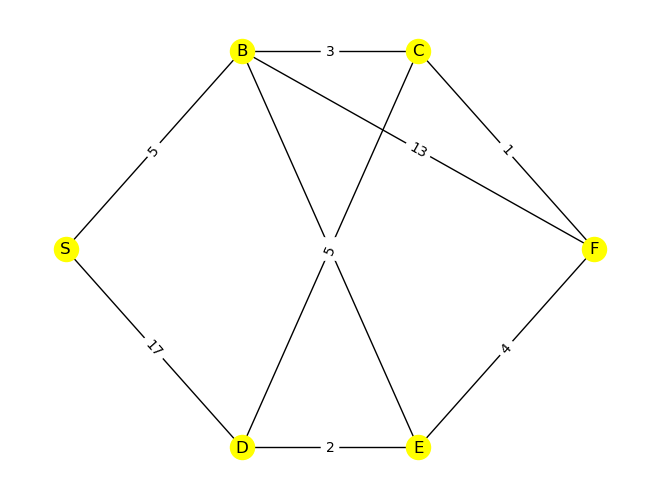

In [19]:
nx.draw(G, pos=pos, with_labels=True, node_color='yellow')
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels);

In [20]:
nx.shortest_path(G, source='S', target=None, weight='weight')

{'S': ['S'],
 'B': ['S', 'B'],
 'D': ['S', 'B', 'C', 'D'],
 'C': ['S', 'B', 'C'],
 'E': ['S', 'B', 'E'],
 'F': ['S', 'B', 'C', 'F']}

In [21]:
nx.shortest_path_length(G, source='S', target=None, weight='weight')

{'S': 0, 'B': 5, 'C': 8, 'F': 9, 'E': 11, 'D': 13}